In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import pandas as pd
import pandas_profiling

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})


import seaborn as sns
from sklearn import metrics, preprocessing, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline
Image(url= "Capture.JPG")

In [2]:
Image(url= "Capture1.JPG")

In [3]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [4]:
titanicData = pd.read_excel('titanic.xls', index_col=None, na_values=['NA'])

In [5]:
titanicData.sample(10)
titanicData.info()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
629,3,0,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
1090,3,0,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S,NaN,NaN,NaN
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
345,2,0,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,NaN,NaN,"St Ives, Cornwall / Calumet, MI"
527,2,0,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S,NaN,NaN,"St Andrews, Guernsey"
583,2,1,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR"
1052,3,0,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,NaN,NaN,NaN
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
368,2,0,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S,NaN,17.0,"Cornwall / Spokane, WA"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# Exploratory Data Analysis

In [6]:
pandas_profiling.ProfileReport(titanicData)

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
titanicData.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Visualization

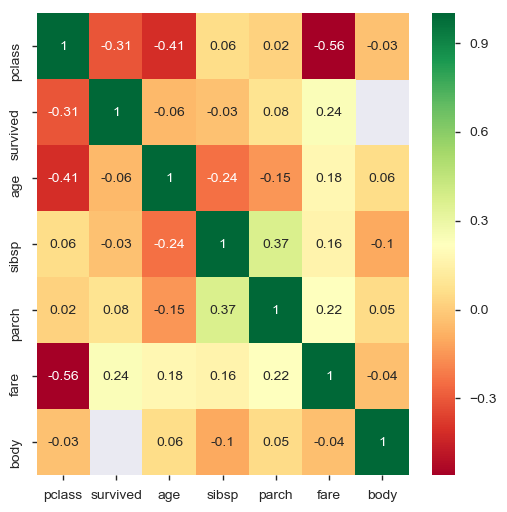

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = titanicData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [9]:
#List of columns of titanicData
titanicData.columns
titanicData.shape

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

(1309, 14)

In [10]:
#let’s examine the overall chance of survival for a Titanic passenger.
titanicData['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,309 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

In [11]:
#To get a view into the composition of each class, we can group data by class, and view the averages for each column:
titanicData.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class.

In [12]:
#Now lets see by grouping function for both class and sex:
class_sex_grouping = titanicData.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

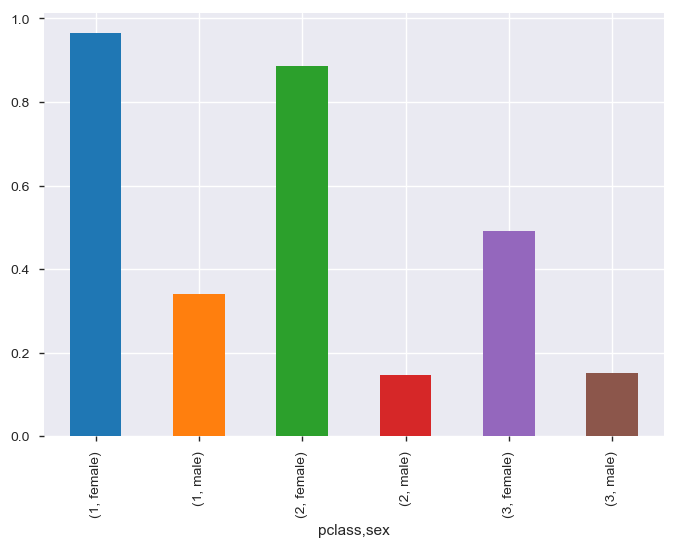

In [13]:
class_sex_grouping['survived'].plot.bar()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Sex')

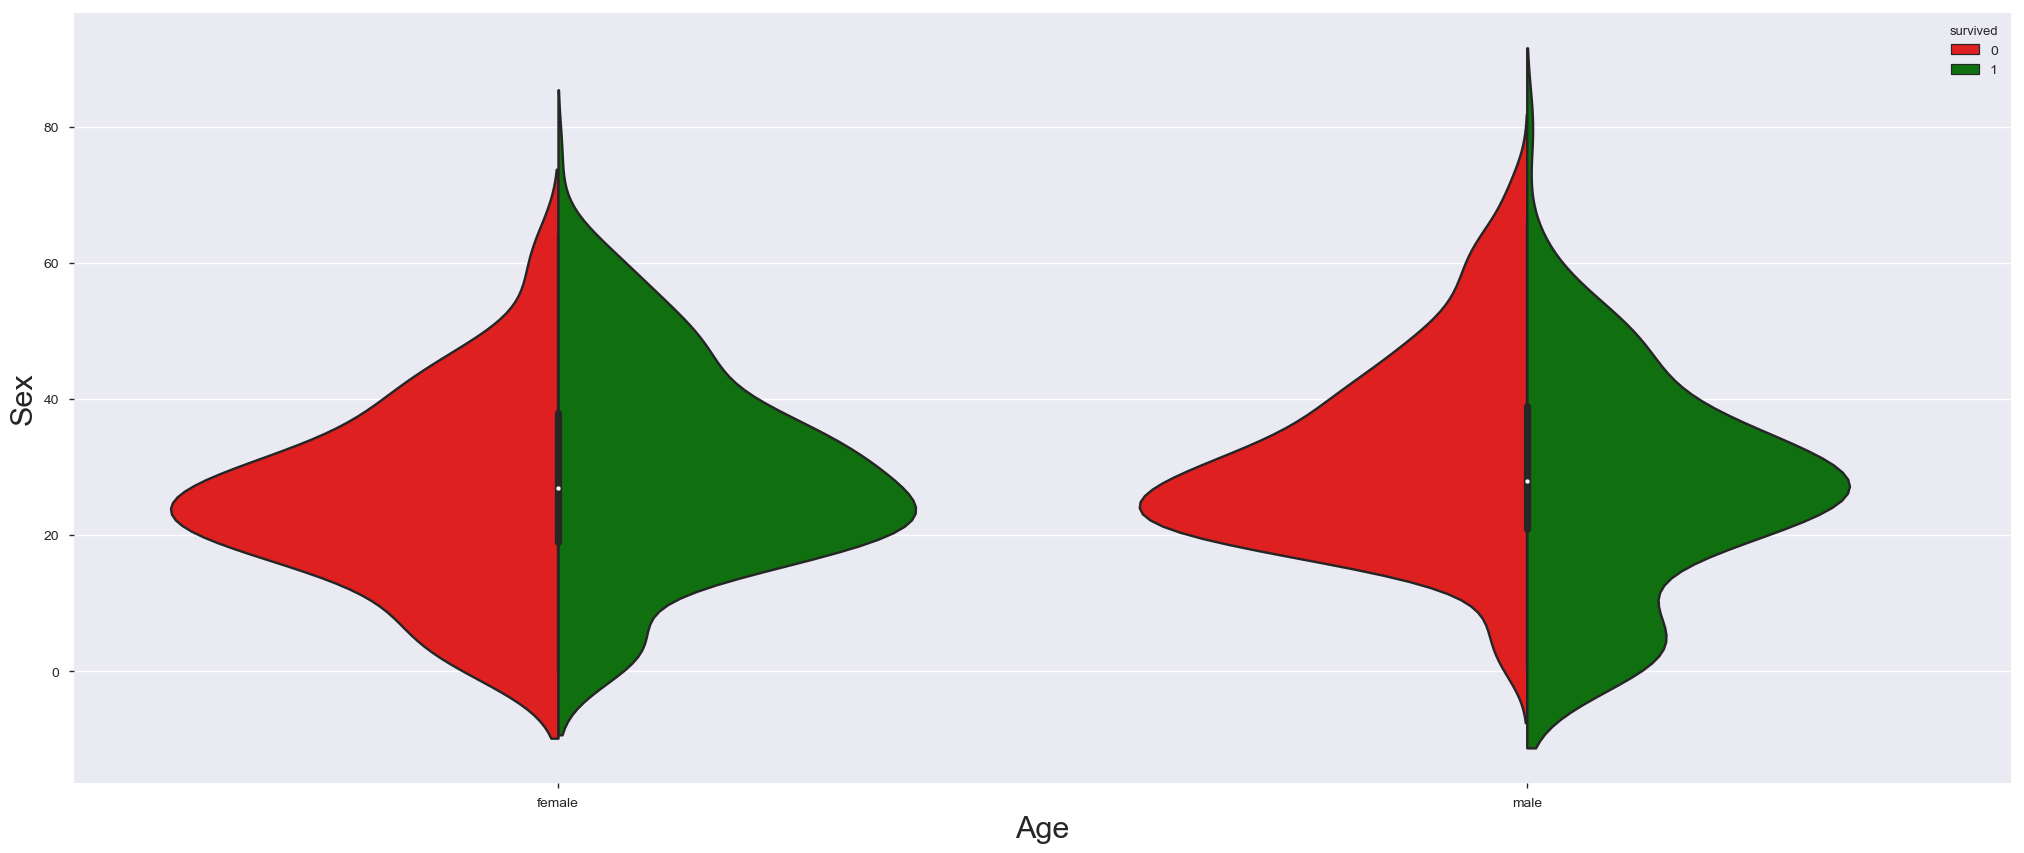

In [14]:
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='sex', y='age', 
               hue='survived', data=titanicData, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Sex',{'fontname':'Arial', 'size':'22'})
plt.show()

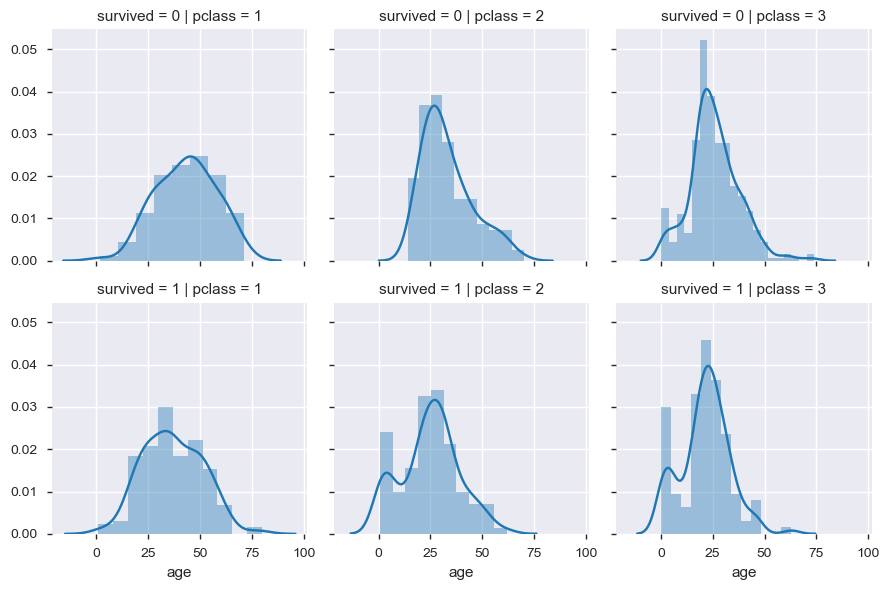

In [15]:
#Survived with pclass and age
g = sns.FacetGrid(titanicData, row='survived', col='pclass')
g.map(sns.distplot, "age")
plt.show()

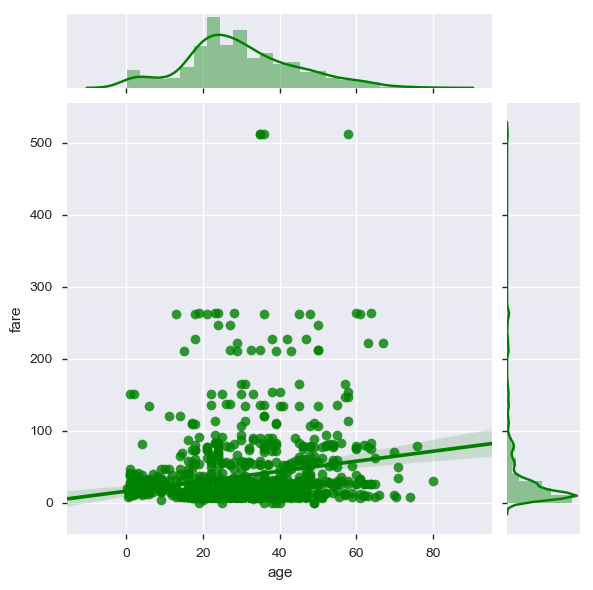

In [16]:
sns.jointplot(data=titanicData, x='age', y='fare', kind='reg', color='g')
plt.show()

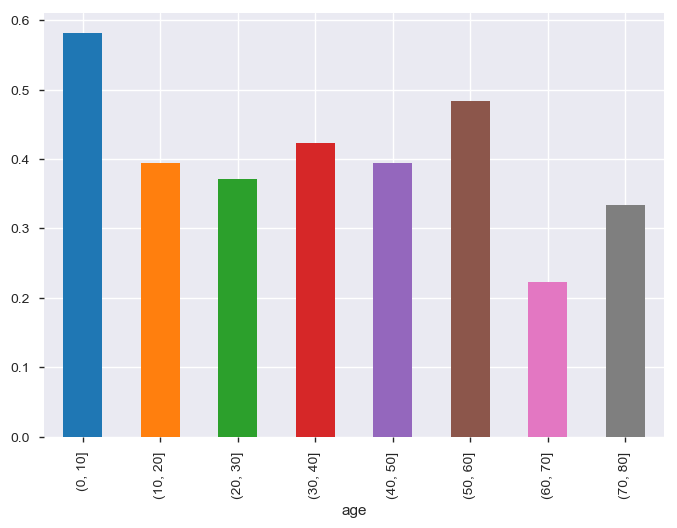

In [17]:
#Plot graph for survived passengers by grouping them with age
group_by_age = pd.cut(titanicData["age"], np.arange(0, 90, 10))
age_grouping = titanicData.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

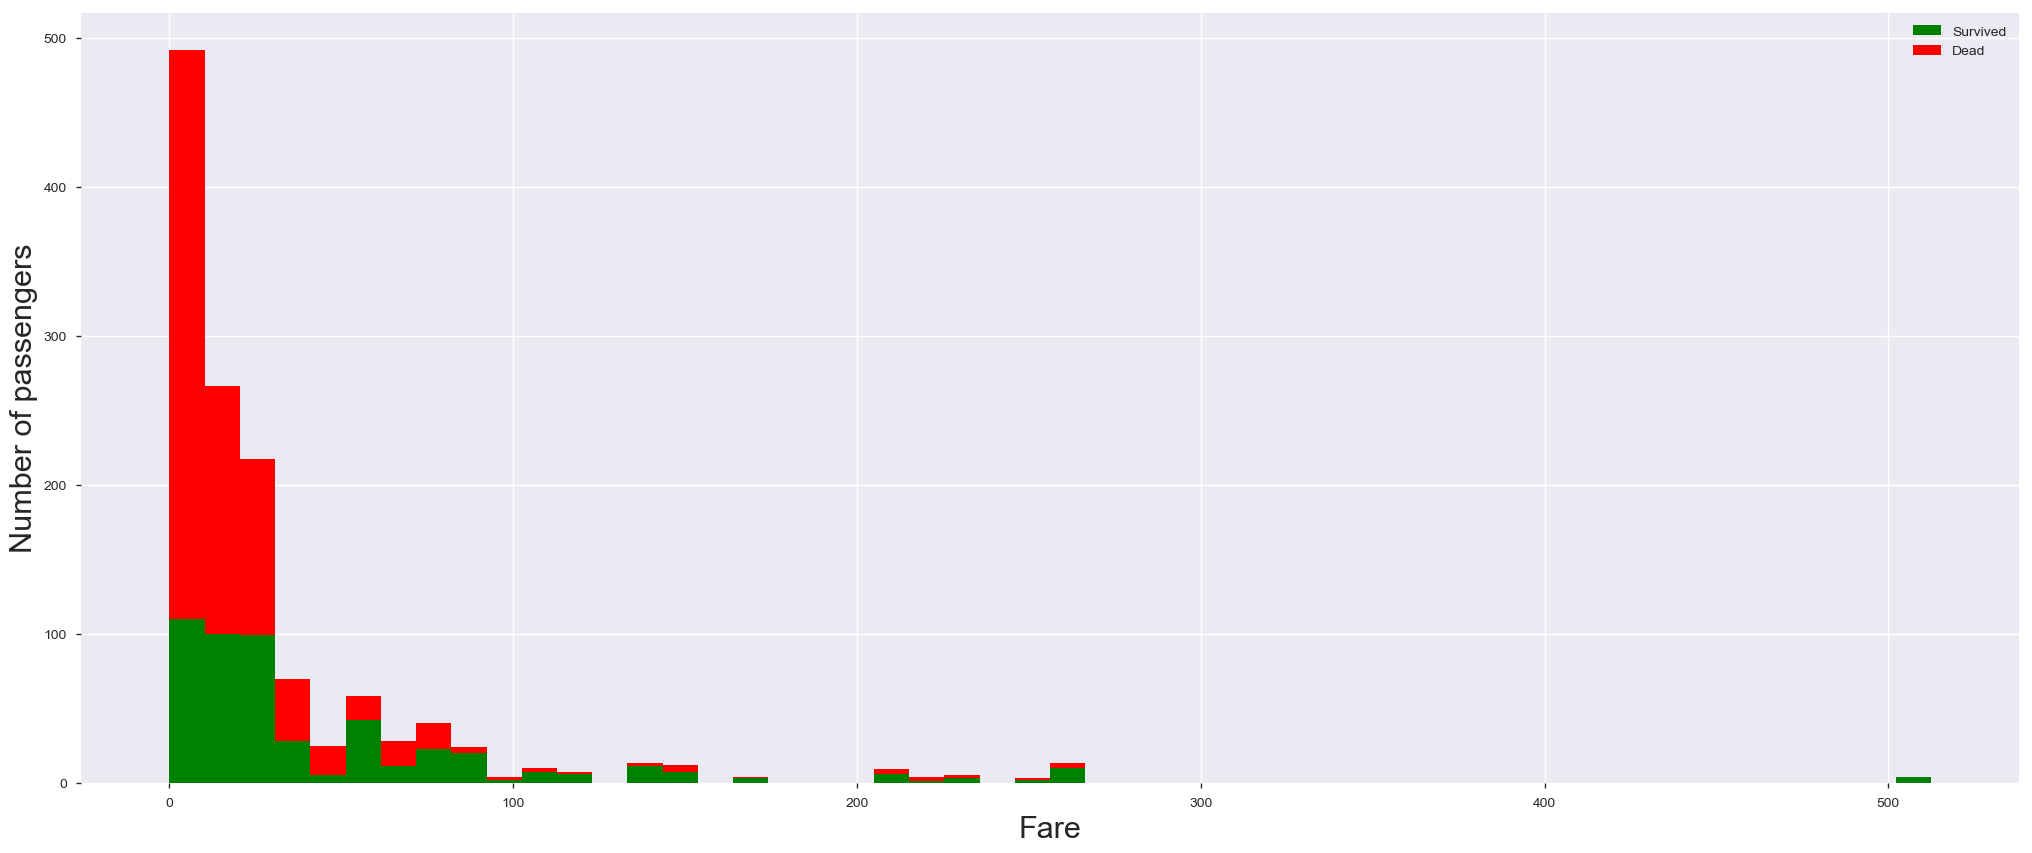

In [18]:
#now focus on the Fare ticket of each passenger and see how it could impact the survival.
figure = plt.figure(figsize=(25, 10))
plt.hist([titanicData[titanicData['survived'] == 1]['fare'], titanicData[titanicData['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Number of passengers',{'fontname':'Arial', 'size':'22'})
plt.legend();

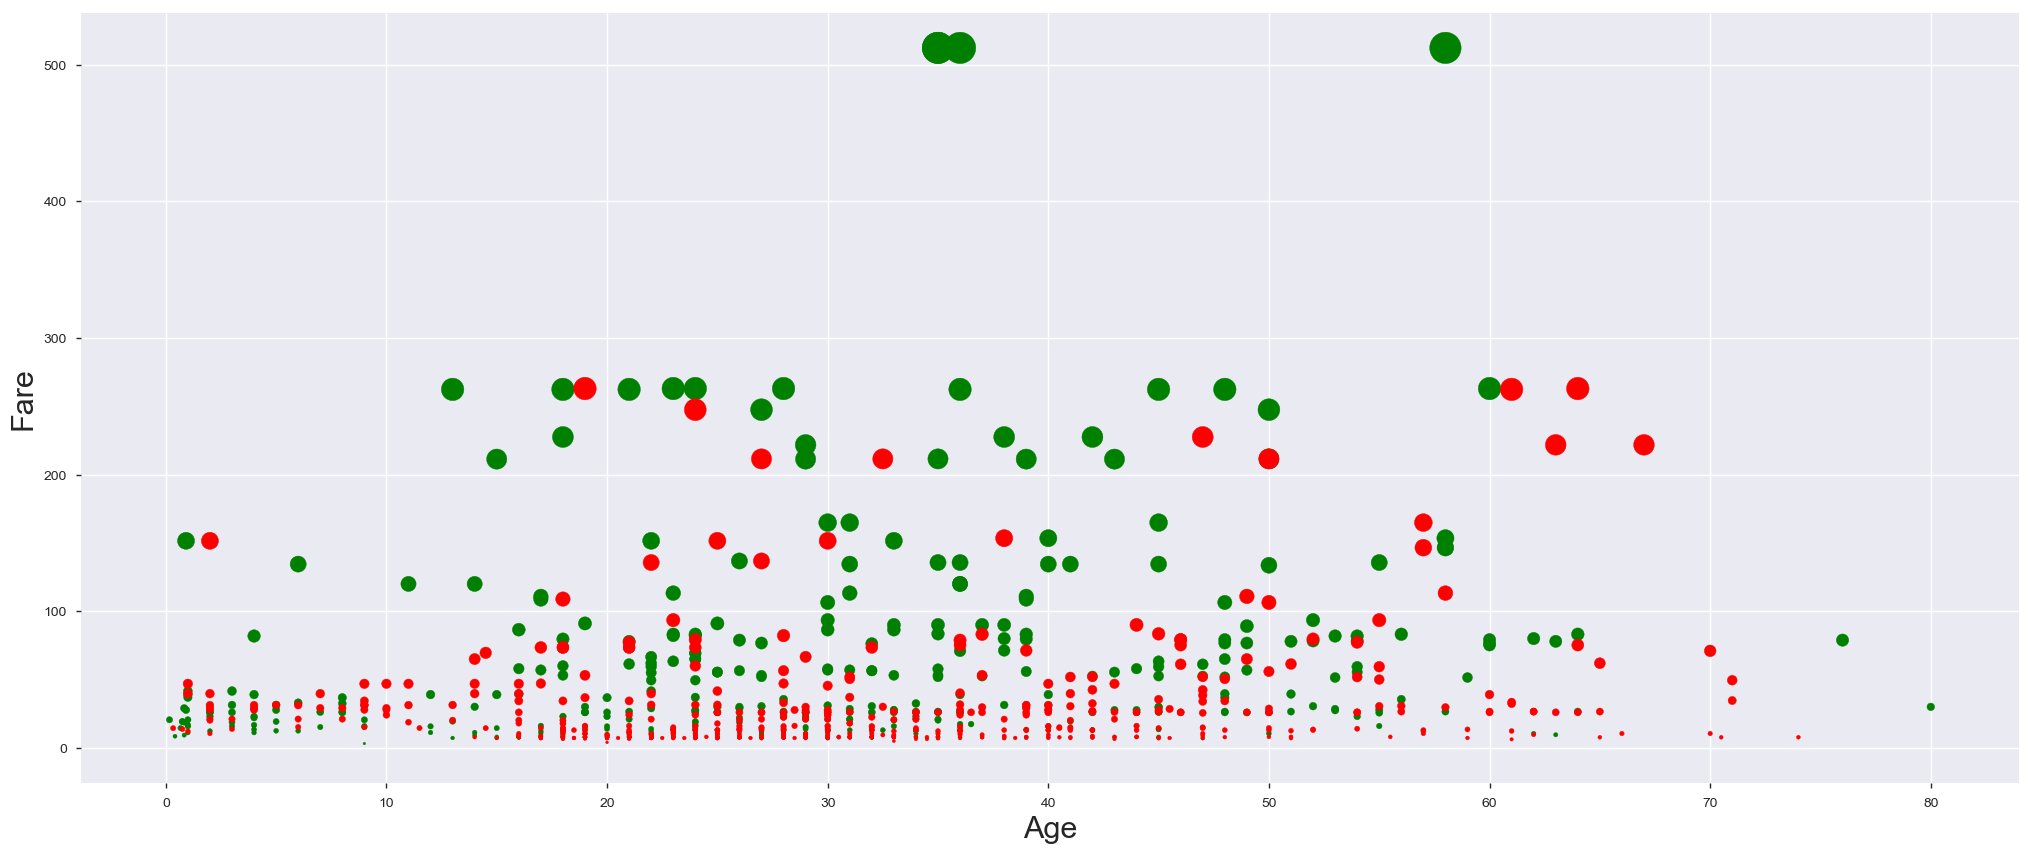

In [19]:
#now combine the age, the fare and the survival on a single chart.
plt.figure(figsize=(25, 10))
ax = plt.subplot()
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Fare',{'fontname':'Arial', 'size':'22'})
ax.scatter(titanicData[titanicData['survived'] == 1]['age'], titanicData[titanicData['survived'] == 1]['fare'], 
           c='green', s=titanicData[titanicData['survived'] == 1]['fare'])
ax.scatter(titanicData[titanicData['survived'] == 0]['age'], titanicData[titanicData['survived'] == 0]['fare'], 
           c='red', s=titanicData[titanicData['survived'] == 0]['fare']);

The size of the circles is proportional to the ticket fare.
- the x-axis, we have the ages 
- the y-axis, we consider the ticket fare.

We can observe different clusters:
- Large green dots between x=20 and x=45: adults with the largest ticket fares
- Small red dots between x=10 and x=45, adults from lower classes on the boat
- Small greed dots between x=0 and x=7: these are the children that were saved

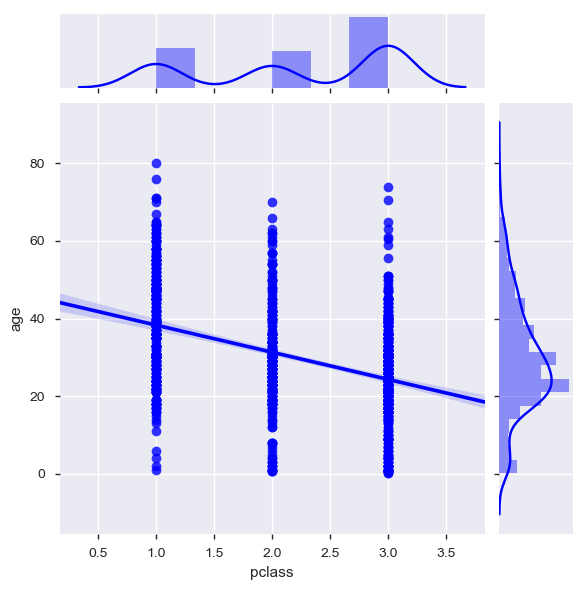

In [20]:
# Comparision with pclass and age 
sns.jointplot(data=titanicData, x='pclass', y='age', kind='reg', color='b')
plt.show()

Text(0.5, 0, 'Average fare')

Text(0, 0.5, 'PClass')

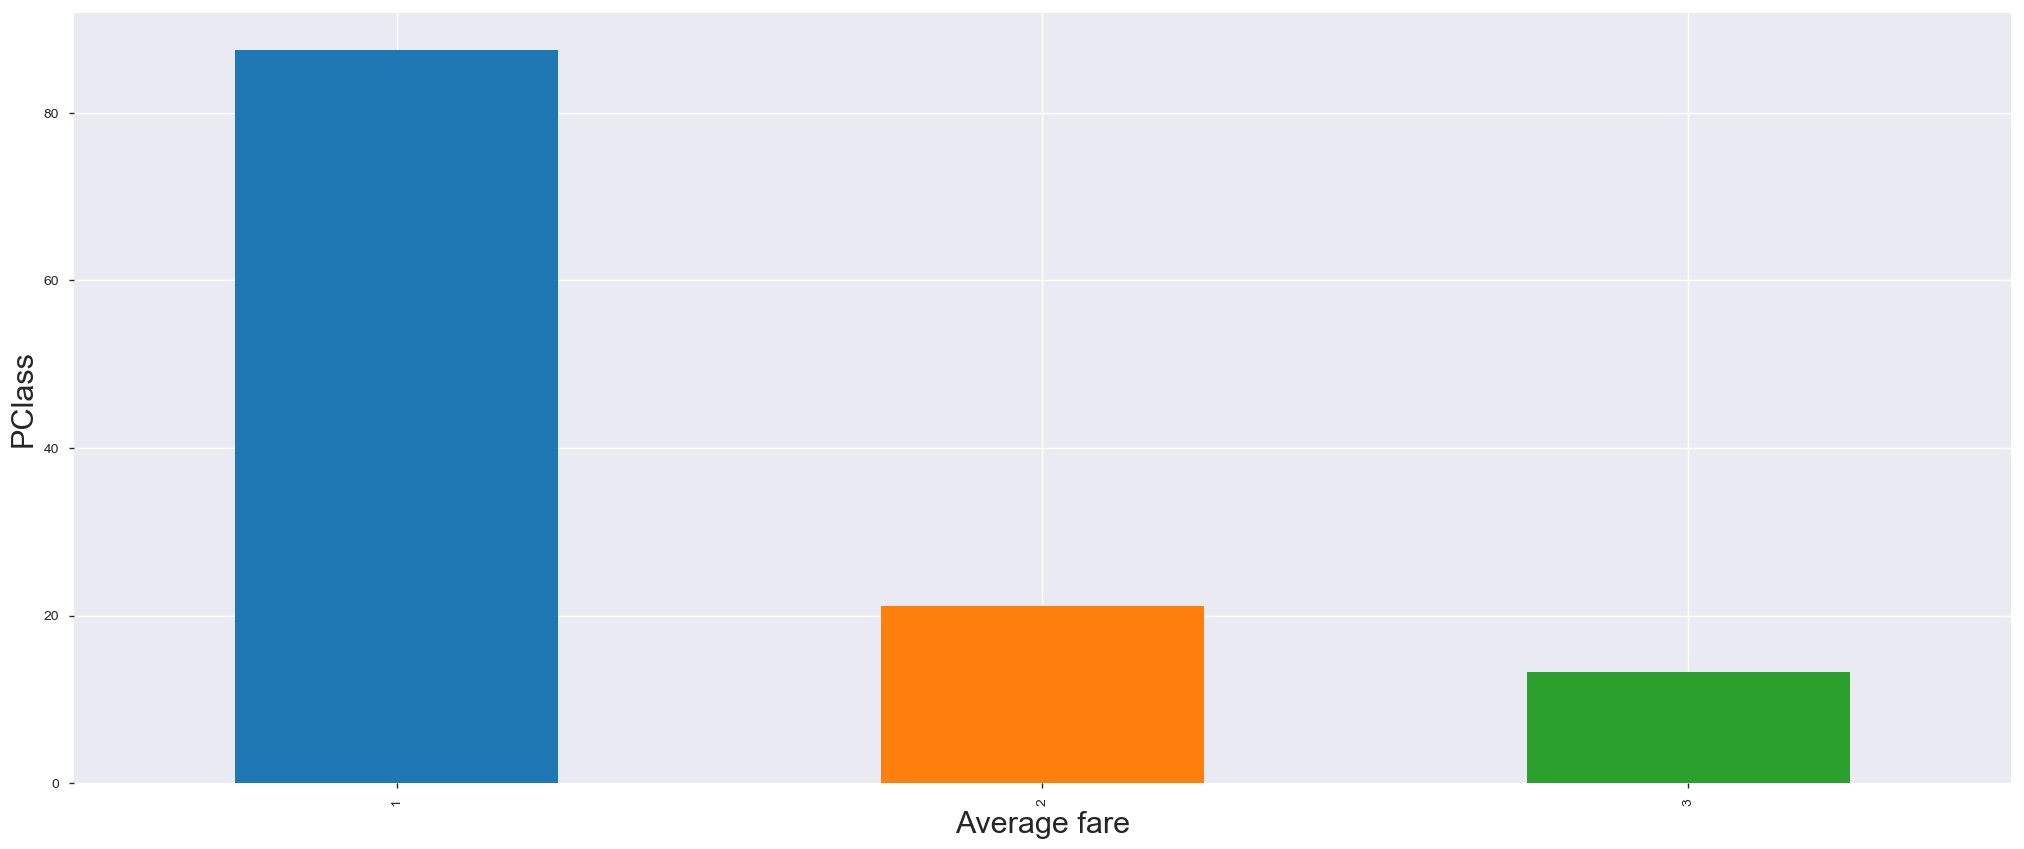

In [21]:
#the ticket fare correlates with the class 
ax = plt.subplot()
titanicData.groupby('pclass').mean()['fare'].plot(kind='bar', figsize=(25, 10), ax = ax)
plt.xlabel('Average fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('PClass',{'fontname':'Arial', 'size':'22'})
plt.show()

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'embarked')

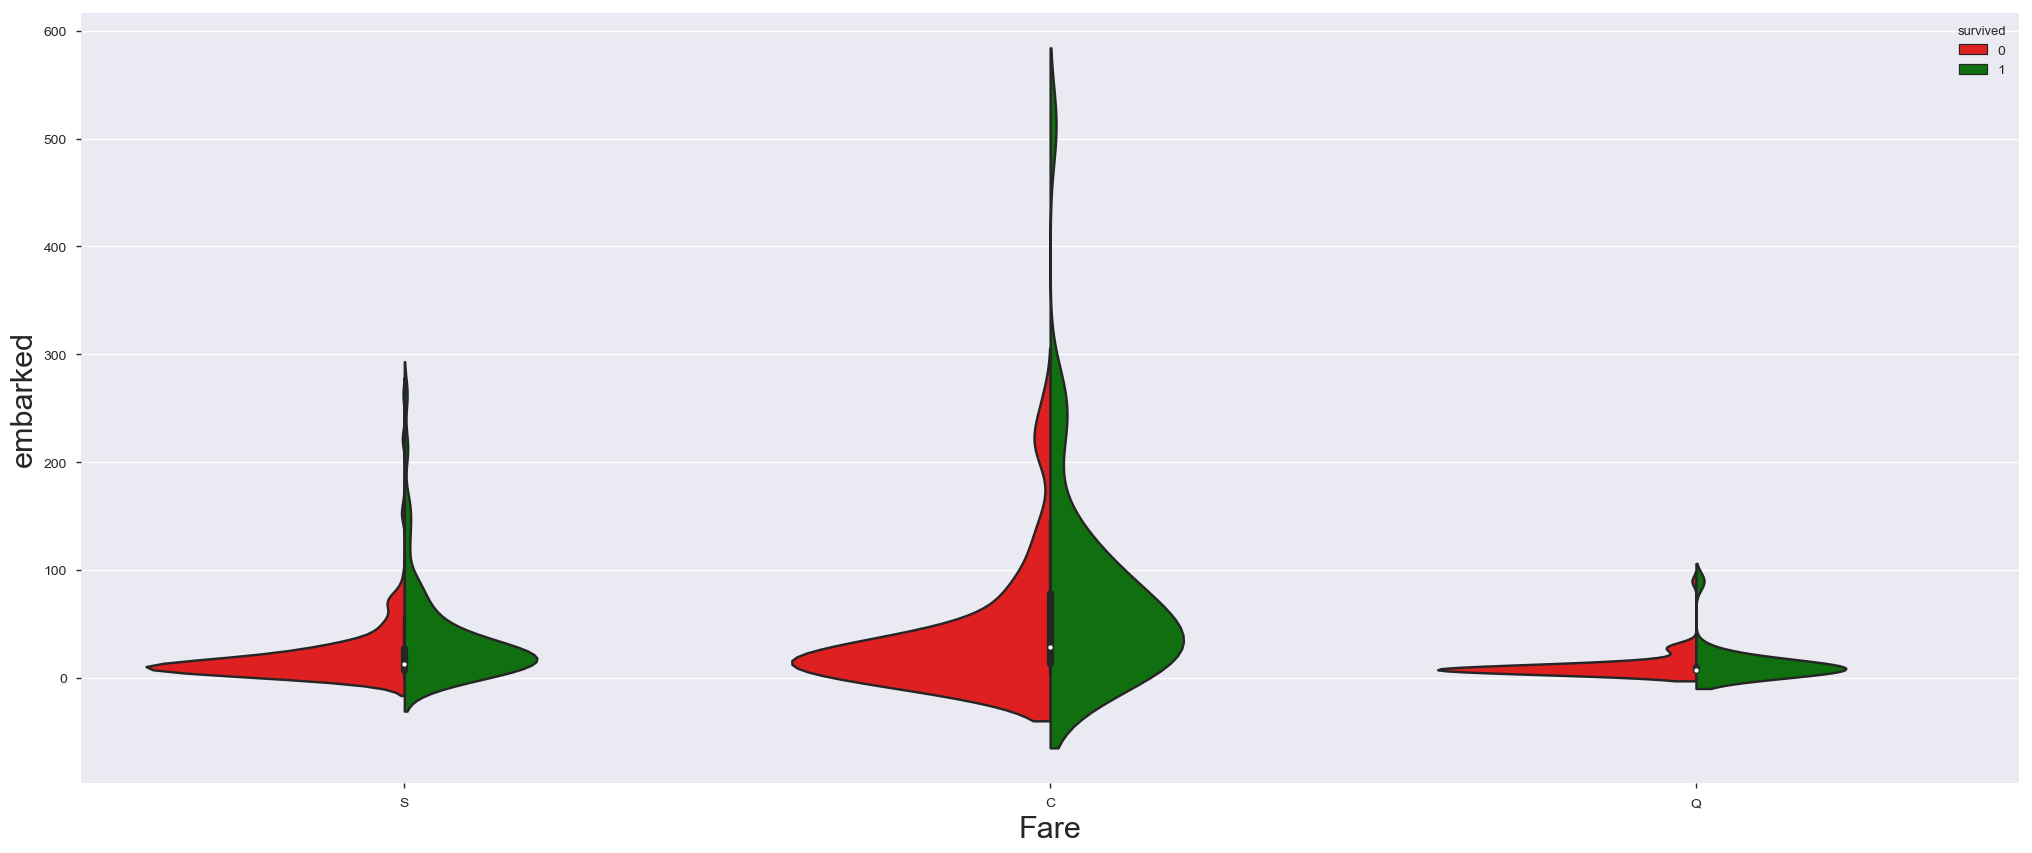

In [22]:
#now see how the embarkation site affects the survival.
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='embarked', y='fare', hue='survived', data=titanicData, split=True, palette={0: "r", 1: "g"})
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('embarked',{'fontname':'Arial', 'size':'22'})
plt.show()

## % of the Survived on overall population

In [23]:
titanicData_survived=titanicData.loc[titanicData.survived==1,]
len(titanicData['survived'])
len(titanicData_survived['survived'])
print(len(titanicData_survived['survived'])/len(titanicData['survived']))

1309

500

0.3819709702062643


# Feature Engginering

In [24]:
featureEngData = titanicData
featureEngData.info()
featureEngData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


(1309, 14)

## Extracting the passenger titles
titles = set()
for name in featureEngData['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

In [25]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    featureEngData['title'] = featureEngData['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title we map each title
    featureEngData['title'] = featureEngData.title.map(Title_Dictionary)    
    return featureEngData

In [26]:
featureEngData = get_titles()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [27]:
pd.crosstab(featureEngData['title'],featureEngData['sex']).T.style.background_gradient(cmap='summer_r')

title,Master,Miss,Mr,Mrs,Officer,Royalty
sex,,,,,,
female,0,262,0,200,1,2
male,61,0,757,0,22,3


In [28]:
# check if the titles have been filled correctly.
featureEngData[featureEngData['title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,8,NaN,NaN,NaN


There is indeed a NaN value in the line 218. In fact the corresponding name is Oliva y Ocana, Dona. Fermina.
This title was not encoutered in the train dataset.

In [29]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(featureEngData['title'], prefix='Title')
featureEngData = pd.concat([featureEngData, titles_dummies], axis=1)
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",Miss,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,0,0,1,0,0


## processing for age

In [30]:
print (featureEngData.iloc[:1309].age.isnull().sum())

263


Processing the ages as we have seen age has 263 / 20.1% missing values Missing. As this is large number of missing data and replacing them with mean, median will not give proper outcome, since the age may differ by groups and categories of passengers. Let's group the age with Sex, PClass and Newly added column Title

In [31]:
#Now lets see by grouping function for pclass, title sex:
print(featureEngData.groupby(['sex','pclass','title'])['age'].count())


sex     pclass  title  
female  1       Miss        61
                Mrs         68
                Officer      1
                Royalty      2
        2       Miss        48
                Mrs         55
        3       Miss       103
                Mrs         49
male    1       Master       5
                Mr         132
                Officer     11
                Royalty      3
        2       Master      11
                Mr         137
                Officer     10
        3       Master      37
                Mr         312
Name: age, dtype: int64


In [32]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(featureEngData.age, bins, labels=labels)
featureEngData['age_group'] = age_groups
featureEngData.pivot_table(index='embarked', columns='age_group', aggfunc=np.median).fare

age_group,child,teenager,adult,elder
embarked,,,,
C,17.2646,14.45420,55.4417,68.61460
Q,29.1250,7.74165,7.7500,8.71875
S,26.0000,18.00000,13.0000,26.55000


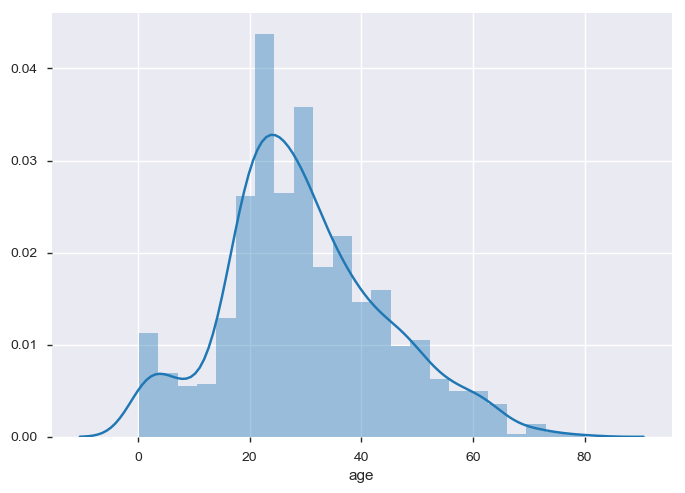

In [33]:
sns.distplot(featureEngData.age.dropna())

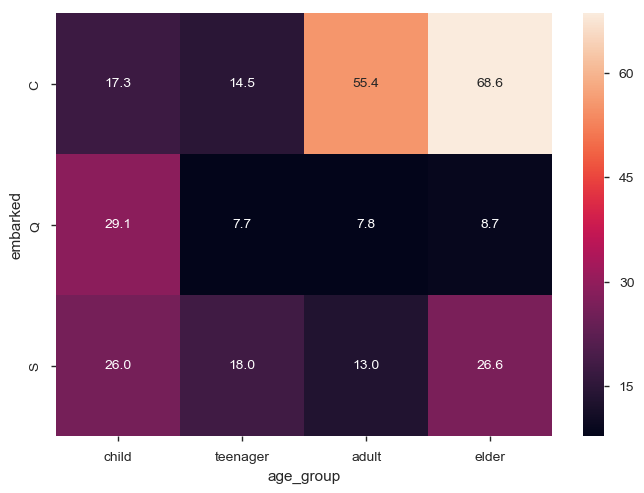

In [34]:
df = featureEngData.pivot_table(index='embarked', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

<Figure size 2000x1000 with 0 Axes>

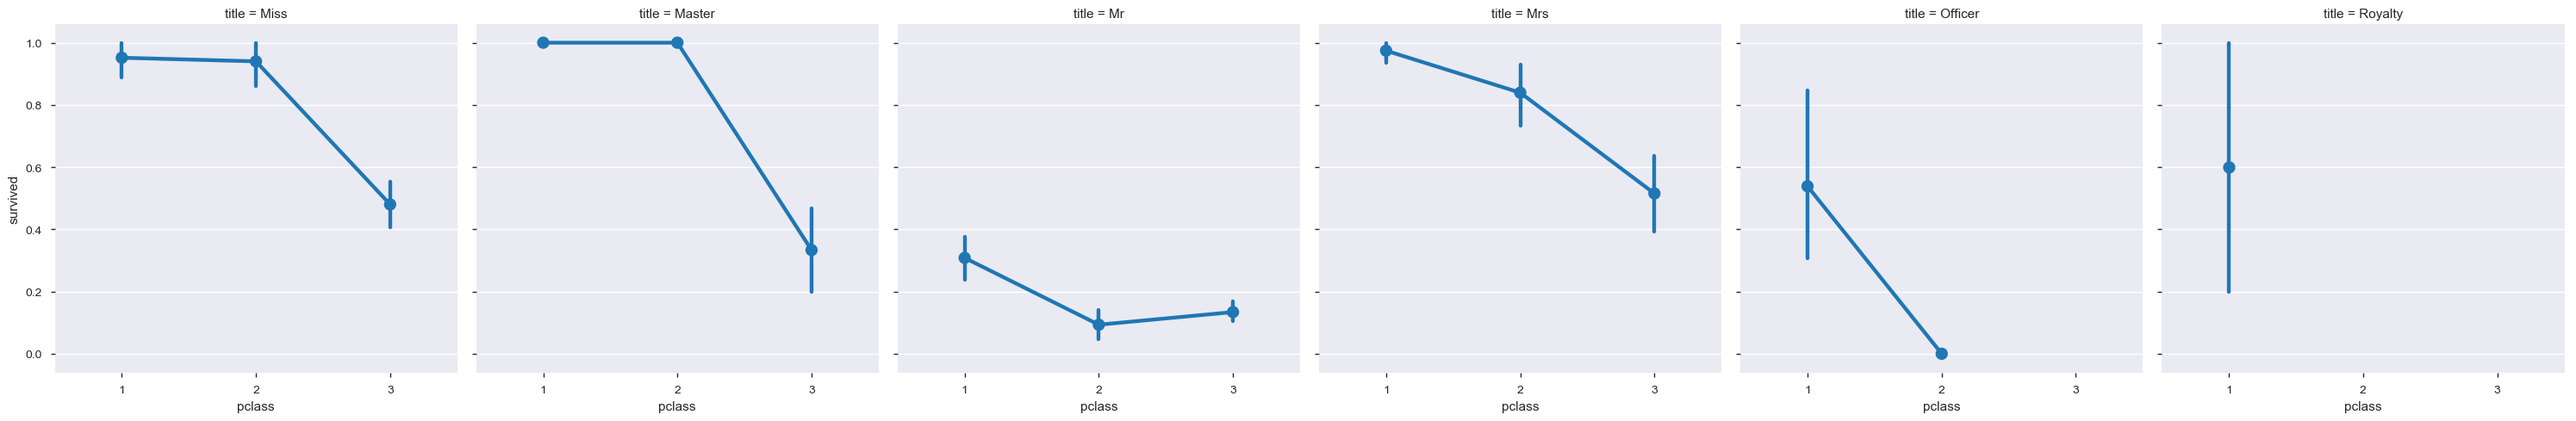

In [35]:
plt.figure(figsize=(20,10))
sns.factorplot('pclass','survived',col='title',data=featureEngData)
sns.despine(top=True, right=True, left=False, bottom=False);

In [36]:
#Now lets see by grouping function for both class, title sex:

grouped_train = featureEngData.iloc[:1309].groupby(['pclass','title','sex'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['sex', 'pclass', 'title', 'age']]

def fill_age(row):
    condition = (
        (grouped_median_train['sex'] == row['sex']) & 
        (grouped_median_train['title'] == row['title']) & 
        (grouped_median_train['pclass'] == row['pclass'])
    ) 
    return grouped_median_train[condition]['age'].values[0]

def process_age():
    # a function that fills the missing values of the Age variable
    featureEngData['age'] = featureEngData.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    return featureEngData

In [37]:
featureEngData = process_age()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,body,home.dest,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,NaN,"St Louis, MO",Miss,0,1,0,0,0,0,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,NaN,"Montreal, PQ / Chesterville, ON",Master,1,0,0,0,0,0,child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,1,0,0,0,0,child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,135.0,"Montreal, PQ / Chesterville, ON",Mr,0,0,1,0,0,0,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,0,0,1,0,0,adult


In [38]:
print (featureEngData.iloc[:1309].age.isnull().sum())

0


Perfect. The missing ages have been replaced.

sibsip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

In [39]:
pd.crosstab(featureEngData['sibsp'],featureEngData['survived']).style.background_gradient('summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


Text(0.5, 1.0, 'SipSp vs Survived in BarPlot')

Text(0.5, 1.0, 'SibSp vs Survived in FactorPlot')

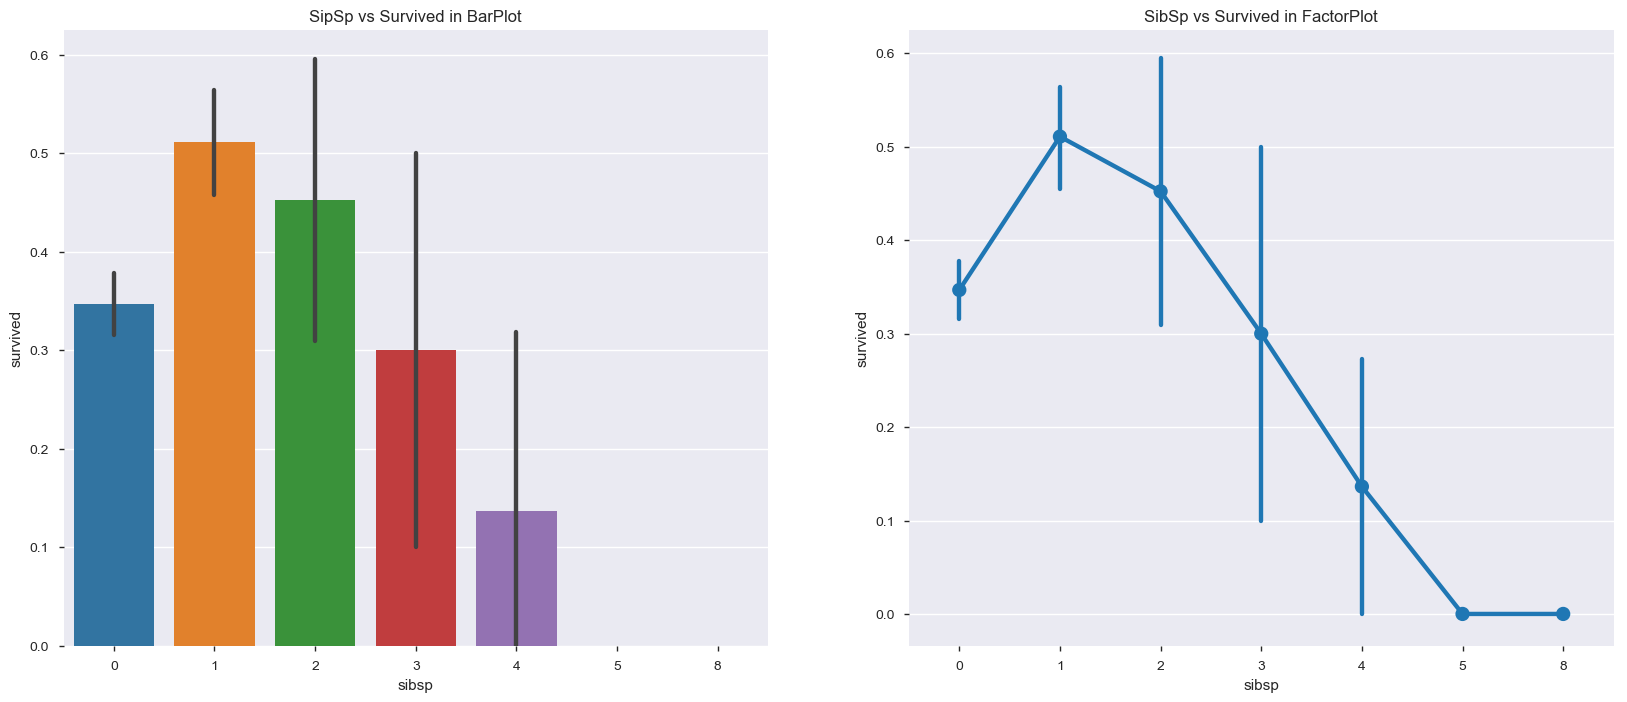

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('sibsp','survived', data=featureEngData,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('sibsp','survived', data=featureEngData,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [41]:
pd.crosstab(featureEngData['sibsp'],featureEngData['pclass']).style.background_gradient('summer_r')

pclass,1,2,3
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


In [42]:
pd.crosstab(featureEngData['sex'],featureEngData['boat']).style.background_gradient('summer_r')

boat,2,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,A,B,C,C D,D
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,1,2,24,18,17,25,0,0,25,13,1,21,9,13,26,14,1,0,18,11,23,1,16,2,0,24,1,13
male,0,3,5,7,2,14,2,1,8,24,0,2,3,13,5,13,1,1,2,12,0,0,9,9,9,14,1,7


In [43]:
pd.crosstab(featureEngData['title'],featureEngData['boat']).style.background_gradient('summer_r')

boat,2,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,A,B,C,C D,D
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Master,0,0,3,3,0,2,0,0,3,2,0,1,2,1,5,1,0,0,0,0,0,0,0,0,0,5,1,2
Miss,1,1,11,10,11,19,0,0,11,8,1,18,4,6,13,3,0,0,6,3,11,1,9,0,0,16,0,6
Mr,0,2,2,4,2,11,2,1,5,22,0,1,1,10,0,11,1,1,1,12,0,0,9,9,8,9,0,5
Mrs,0,0,13,8,6,6,0,0,14,5,0,3,5,7,13,11,1,0,12,8,9,0,7,2,0,8,1,7
Officer,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,1,0,0,0
Royalty,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Above details shows that majortity of boats were provided for female passangers compare to males

In [44]:
pd.crosstab(featureEngData['home.dest'],featureEngData['sex']).T.style.background_gradient('summer_r')

home.dest,"?Havana, Cuba","Aberdeen / Portland, OR","Albany, NY","Altdorf, Switzerland","Amenia, ND","Antwerp, Belgium / Stanton, OH",Argentina,"Asarum, Sweden Brooklyn, NY","Ascot, Berkshire / Rochester, NY","Auburn, NY","Aughnacliff, Co Longford, Ireland New York, NY","Australia Fingal, ND",Austria,"Austria Niagara Falls, NY",Austria-Hungary,"Austria-Hungary / Germantown, Philadelphia, PA","Bangkok, Thailand / Roseville, IL","Barcelona, Spain / Havana, Cuba","Barre, Co Washington, VT","Basel, Switzerland","Bath, England / Massachusetts","Bayside, Queens, NY",Belfast,"Belfast, NI","Belgium Montreal, PQ","Belgium Detroit, MI","Belmont, MA","Bennington, VT","Bergen, Norway","Berne, Switzerland / Central City, IA","Birkdale, England Cleveland, Ohio","Bishopstoke, Hants / Fayette Valley, ID","Boston, MA","Bournemouth, England","Bournemouth, England Newark, NJ","Bournmouth, England","Brennes, Norway New York","Bridgerule, Devon","Bridgwater, Somerset, England","Brighton, MA","Brighton, Sussex","Bristol, Avon / Jacksonville, FL","Bristol, England / New Britain, CT","Bristol, England Cleveland, OH","Brockton, MA","Bromsgrove, England / Montreal, PQ","Bronx, NY","Brookline, MA","Brooklyn, NY","Broomfield, Chelmsford, England","Brunswick, ME","Bryn Mawr, PA","Bryn Mawr, PA, USA","Buenos Aires, Argentina / New Jersey, NJ","Buffalo, NY","Bulgaria Chicago, IL","Bulgaria Coon Rapids, IA","Calgary, AB","Cambridge, MA","Cape Town, South Africa / Seattle, WA","Catford, Kent / Detroit, MI","Chelsea, London","Chicago, IL","Cincinatti, OH","Clevedon, England","Co Athlone, Ireland New York, NY","Co Clare, Ireland Washington, DC","Co Cork, Ireland Charlestown, MA","Co Cork, Ireland Roxbury, MA","Co Limerick, Ireland Sherbrooke, PQ","Co Longford, Ireland New York, NY","Co Sligo, Ireland Hartford, CT","Co Sligo, Ireland New York, NY","Cologne, Germany","Columbus, OH","Cooperstown, NY","Copenhagen, Denmark",Cornwall,"Cornwall / Akron, OH","Cornwall / Camden, NJ","Cornwall / Clear Creek, CO","Cornwall / Hancock, MI","Cornwall / Houghton, MI","Cornwall / Spokane, WA","Cornwall, England Houghton, MI",Croatia,"Dagsas, Sweden Fower, MN","Deephaven, MN / Cedar Rapids, IA","Deer Lodge, MT","Denmark / New York, NY","Denmark Hill, Surrey / Chicago","Denver, CO","Detroit, MI","Devon, England Wichita, KS","Devonport, England","Dorchester, MA","Dorking, Surrey, England","Dowagiac, MI","Duluth, MN","East Bridgewater, MA","East Orange, NJ","East Providence, RI","Effington Rut, SD","Elizabeth, NJ","Elkins Park, PA","Elmira, NY / Orange, NJ",England,"England / Bennington, VT","England / Detroit, MI","England / Hartford, CT","England / Philadelphia, PA","England / Sacramento, CA","England / San Francisco, CA","England Albion, NY","England Brooklyn, NY","England New York, NY","England Oglesby, IL","England Salt Lake City, Utah","Finland / Minneapolis, MN","Finland / Washington, DC","Finland Sudbury, ON","Folkstone, Kent / New York, NY","Fond du Lac, WI","Foresvik, Norway Portland, ND","Frankfort, KY","Gallipolis, Ohio / ? Paris / New York","Geneva, Switzerland / Radnor, PA","Germantown, Philadelphia, PA",Glasgow,"Glasgow / Bangor, ME","Glen Ridge, NJ","Goteborg, Sweden / Rockford, IL","Goteborg, Sweden Huntley, IL",Greece,"Green Bay, WI","Greenport, NY","Greensburg, PA","Greenwich, CT",Guernsey,"Guernsey / Elizabeth, NJ","Guernsey / Montclair, NJ and/or Toledo, Ohio","Guernsey / Wilmington, DE","Guernsey, England / Edgewood, RI","Gunnislake, England / Butte, MT","Guntur, India / Benton Harbour, MI","Haddenfield, NJ","Halesworth, England","Halifax, NS","Hamilton, ON","Harrisburg, PA","Harrow, England","Harrow-on-the-Hill, Middlesex","Hartford, CT","Hartford, Huntingdonshire","Haverford, PA","Haverford, PA / Cooperstown, NY","Helsinki, Finland Ashtabula, Ohio","Hessle, Yorks","Holley, NY","Hong Kong New York, NY","Hornsey, England","Hudson, NY","Huntington, WV","Ilford, Essex / Winnipeg, MB","Ilfracombe, Devon","Illinois, USA","India / Pittsburgh, PA","India / Rapid Ci

## processing for fare

In [45]:
print (featureEngData.iloc[:1309].fare.isnull().sum())

1


In [46]:
# there's one missing fare value - replacing it with the mean.
featureEngData.fare.fillna(featureEngData.iloc[:1309].fare.mean(), inplace=True)
print (featureEngData.iloc[:1309].fare.isnull().sum())

0


## processing for Embarked

In [47]:
print (featureEngData.iloc[:1309].embarked.isnull().sum())

2


In [48]:
print('Counts of Labels')
featureEngData.groupby("embarked").size()

Counts of Labels


embarked
C    270
Q    123
S    914
dtype: int64

In [49]:
# two missing embarked values - filling them with the most frequent one in the featureEngData set(S)
featureEngData1  = featureEngData.embarked.fillna('S', inplace=True)

In [50]:
# dummy encoding for embarked values 
embarked_dummies = pd.get_dummies(featureEngData['embarked'], prefix='Embarked')
featureEngData = pd.concat([featureEngData, embarked_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,age_group,Embarked_C,Embarked_Q,Embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,0,1,0,0,0,0,adult,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,1,0,0,0,0,0,child,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,0,1,0,0,0,0,child,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,0,0,1,0,0,0,adult,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,0,0,0,1,0,0,adult,0,0,1


(1309, 25)

## processing for cabin

In [51]:
print (featureEngData.iloc[:1309].cabin.isnull().sum())

1014


In [52]:
# replacing missing cabins with U (for Uknown)
featureEngData.cabin.fillna('U', inplace=True)
print (featureEngData.iloc[:1309].cabin.isnull().sum())

0


In [53]:
#Takenfirst letter of name Cabin ex. C22 
train_cabin = set()

for c in featureEngData.iloc[:1309]['cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

print (train_cabin)

{'G', 'E', 'F', 'A', 'B', 'T', 'U', 'C', 'D'}


In [54]:
# mapping each Cabin value with the cabin letter
featureEngData['cabin'] = featureEngData['cabin'].map(lambda C: C[0])

# dummy encoding ...
cabin_dummies = pd.get_dummies(featureEngData['cabin'], prefix='Cabin')    

featureEngData = pd.concat([featureEngData, cabin_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 34)

## Processing for sex mapping string values to numerical one 

In [55]:
featureEngData['sex'] = featureEngData['sex'].map({'male':1, 'female':0})
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 34)

## processing for pclass

In [56]:
print (featureEngData.iloc[:1309].pclass.isnull().sum())

0


In [57]:
# encoding into 3 categories:
pclass_dummies = pd.get_dummies(featureEngData['pclass'], prefix="Pclass")
# adding dummy variable
featureEngData = pd.concat([featureEngData, pclass_dummies],axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,0,0,0,0,0,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0


(1309, 37)

## processing for ticket

In [58]:
print (featureEngData.iloc[:1309].ticket.isnull().sum())

0


In [59]:
NoneType = type(None)
IntType = type(int)
def cleanTicket(ticket):
    if type(ticket) == NoneType:
        return 'XXX'
    elif type(ticket) == int:
        return 'XXX'
    else:
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

In [60]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
tickets = set()
for t in featureEngData['ticket']:
    tickets.add(cleanTicket(t))

In [61]:
# Extracting dummy variables from tickets:

featureEngData['ticket'] = featureEngData['ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(featureEngData['ticket'], prefix='Ticket')
featureEngData = pd.concat([featureEngData, tickets_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1


(1309, 74)

In [62]:
print('Counts of Labels')
featureEngData.groupby("ticket").size()

#featureEngData.groupby("ticket").plot(kind='barh', figsize=(25, 25))

Counts of Labels


ticket
A            1
A4          10
A5          28
AQ3          1
AQ4          1
AS           1
C            8
CA          68
CASOTON      1
FC           3
FCC          9
Fa           1
LINE         4
LP           1
PC          92
PP           4
PPP          2
SC           2
SCA3         1
SCA4         2
SCAH         5
SCOW         1
SCPARIS     14
SCParis      5
SOC          8
SOP          1
SOPP         7
SOTONO2      3
SOTONOQ     24
SP           1
STONO       14
STONO2       7
STONOQ       1
SWPP         2
WC          15
WEP          4
XXX        957
dtype: int64

## Introducing a new feature : the size of families 

Below we are introduces 4 new features:

FamilySize : the total number of relatives including the passenger (him/her)self.
Sigleton : a boolean variable that describes families of size = 1
SmallFamily : a boolean variable that describes families of 2 <= size <= 4
LargeFamily : a boolean variable that describes families of 5 < size

In [63]:
# introducing a new feature : the size of families (including the passenger)
featureEngData['FamilySize'] = featureEngData['parch'] + featureEngData['sibsp'] + 1

# introducing other features based on the family size
featureEngData['Singleton'] = featureEngData['FamilySize'].map(lambda s: 1 if s == 1 else 0)
featureEngData['SmallFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
featureEngData['LargeFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,1,1,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0


(1309, 78)

In [64]:
print('Counts of Labels')
featureEngData.groupby("embarked").size()

Counts of Labels


embarked
C    270
Q    123
S    916
dtype: int64

In [65]:
#Making copy of Feature Engginering dataset
featureEngData1 = featureEngData.copy()

## removing all duplicate and unused variables

In [66]:
featureEngData1.drop('name', axis=1, inplace=True)
featureEngData1.drop('embarked', axis=1, inplace=True)
featureEngData1.drop('cabin', axis=1, inplace=True)
featureEngData1.drop('pclass',axis=1,inplace=True)
featureEngData1.drop('ticket', inplace=True, axis=1)
featureEngData1.drop('title', axis=1, inplace=True)
featureEngData1.drop('boat', axis=1, inplace=True)
featureEngData1.drop('body', axis=1, inplace=True)
featureEngData1.drop('home.dest', axis=1, inplace=True)
featureEngData1.drop('survived', axis=1, inplace=True)
featureEngData1.drop('age_group', axis=1, inplace=True)

In [67]:
featureEngData1.head()
featureEngData1.columns
featureEngData1.shape

,sex,age,sibsp,parch,fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,29.0000,0,0,211.3375,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,1,0.9167,1,2,151.5500,1,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
2,0,2.0000,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,1,30.0000,1,2,151.5500,0,0,1,0,0,...,0,0,0,0,0,1,4,0,1,0
4,0,25.0000,1,2,151.5500,0,0,0,1,0,...,0,0,0,0,0,1,4,0,1,0


Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'Singleton',
       'SmallFamily', 'LargeFamily'],
 

(1309, 67)

In [68]:
X = featureEngData1
y = featureEngData['survived'].values

# Now start building the models using this converted data

## Creating training dataset

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(1047, 67)

(262, 67)

(1047,)

(262,)

pandas.core.frame.DataFrame

## Creating Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini",max_depth=5)
clf_dt.fit (X_train, y_train)
classes = clf_dt.predict(X_test)
clf_dt.score (X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8015267175572519

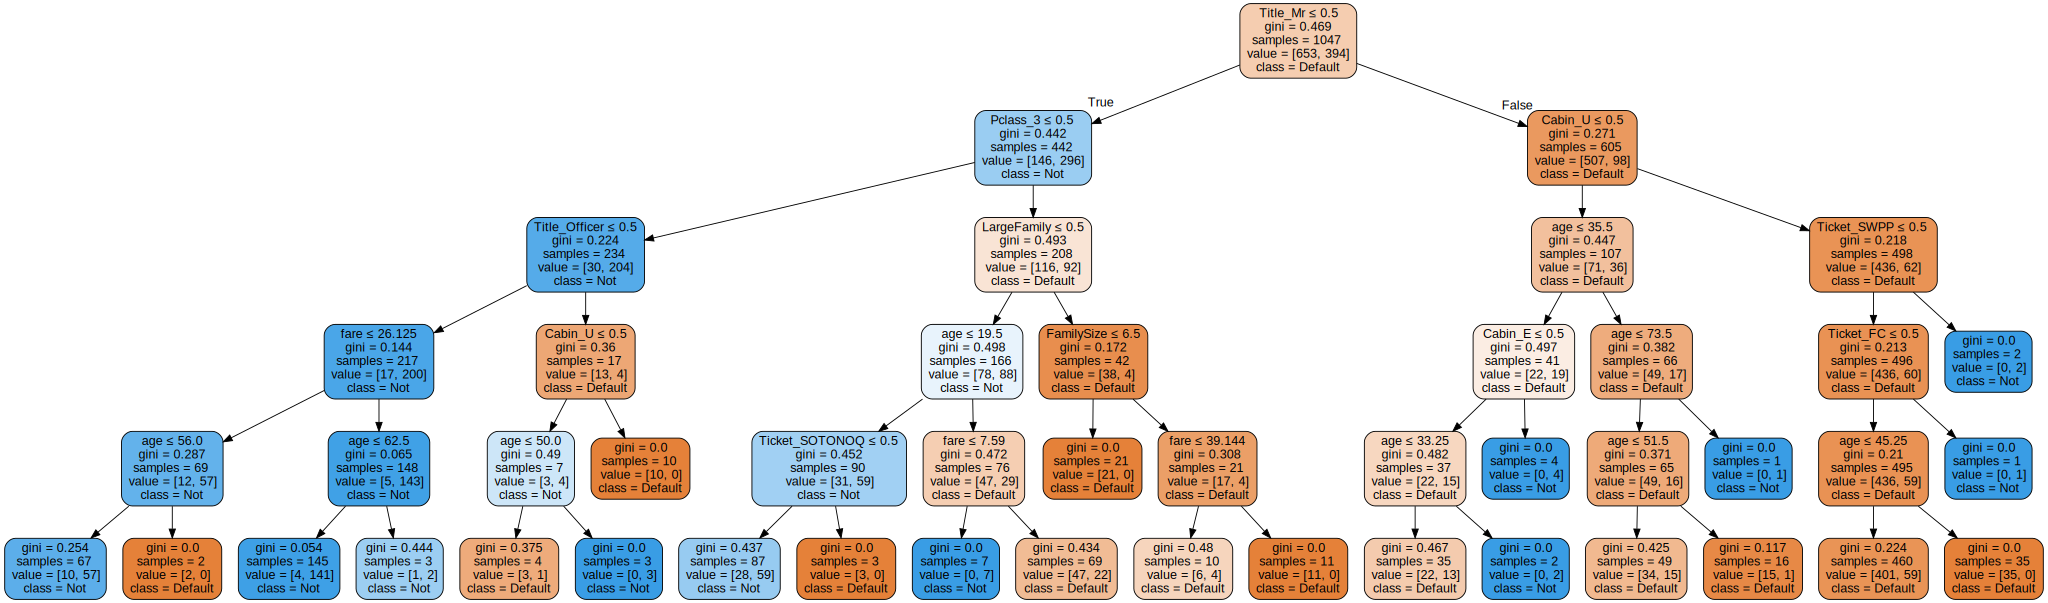

In [71]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                               feature_names=X_train.columns,
                               class_names=['Default','Not'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Precision and Recall

In [72]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,classes))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,classes))
print('AUC')
print(metrics.roc_auc_score(y_test,classes))

Accuracy Score
0.8015267175572519
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       156
           1       0.86      0.61      0.71       106

   micro avg       0.80      0.80      0.80       262
   macro avg       0.82      0.77      0.78       262
weighted avg       0.81      0.80      0.79       262

AUC
0.7713473633284954


## ROC Chart

Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

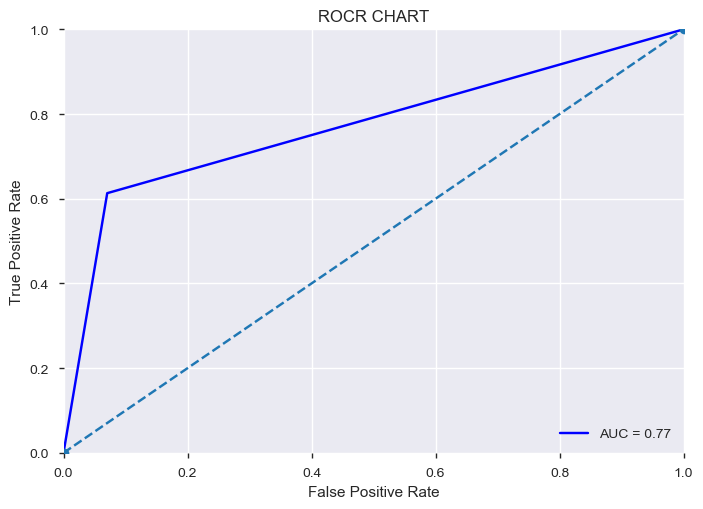

In [73]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix

Confusion Matrix


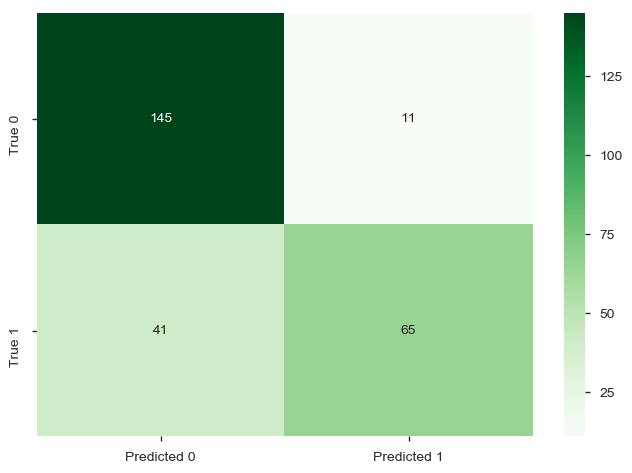

In [74]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [75]:
feature_imp=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(clf_dt.feature_importances_)],axis=1)

In [76]:
feature_imp.columns=['Feature','Relative_Importance']

In [77]:
feature_imp=feature_imp.sort_values('Relative_Importance',ascending=False)

In [78]:
feature_imp.head(10)

,Feature,Relative_Importance
7,Title_Mr,0.528377
25,Pclass_3,0.163026
1,age,0.075181
9,Title_Officer,0.059608
66,LargeFamily,0.050879
22,Cabin_U,0.042547
4,fare,0.037809
59,Ticket_SWPP,0.012354
54,Ticket_SOTONOQ,0.010704
18,Cabin_E,0.010243


In [79]:
decision_tree_accuracy_score = metrics.accuracy_score(y_test,classes)
print(decision_tree_accuracy_score)

0.8015267175572519


In [80]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_dt.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)

(262, 2)

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [81]:
#Generate Model Diagnostics
predictions = clf_dt.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using Decision Tree : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using Decision Tree : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using Decision Tree : -  106
Negative cases in Test Data using Decision Tree : -  156


## Logistic Regression

In [82]:
from sklearn.linear_model import  LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
print('Coefficients: \n',log_model.coef_)

Coefficients: 
 [[-1.07635714 -0.02923796 -0.36287666 -0.18139758  0.00241318  1.20066323
   0.38919303 -1.0520827   0.93020022 -0.78597604 -0.16459186  0.53183375
   0.11641469  0.03644472  0.45213407  0.26470675 -0.16795436  0.28017082
   0.81484566  0.45492057 -0.65531979 -0.25019644 -0.50861412  0.92818718
   0.31773015 -0.56122417  0.34733118 -0.38644332 -0.30159913 -0.47349522
   0.         -0.07115025  0.07910294  0.12729408 -0.14077329  0.22427147
  -0.24581731  0.         -0.16143796 -0.07107882 -0.25223422  0.55836521
  -0.03643891 -0.14077329 -0.1958045  -0.14167194 -0.36683408  0.
   0.52735129  0.02501333 -0.3485905   0.         -0.03674953  0.60006375
  -0.29362553 -0.08491817  1.25510901 -0.05012175  0.          1.30927712
  -0.52744074 -0.17273934  0.13125155  0.14041893  0.59895193  0.60918595
  -0.52344472]]


In [84]:
#Find out key predictor of churn
coeff= pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
14,Cabin_A,0.452134
15,Cabin_B,0.264707
16,Cabin_C,-0.167954
17,Cabin_D,0.280171
18,Cabin_E,0.814846
19,Cabin_F,0.454921
20,Cabin_G,-0.655320
21,Cabin_T,-0.250196
22,Cabin_U,-0.508614
11,Embarked_C,0.531834


In [85]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': log_model.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)

(262, 2)

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [86]:
#Generate Model Diagnostics
predictions = log_model.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using Logistic Regresion : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using Logistic Regresion : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using Logistic Regresion : -  106
Negative cases in Test Data using Logistic Regresion : -  156


## Precision and Recall

In [87]:
#Precision and Recall
print('Accuracy Score')
logistic_reg_accuracy_score = round(metrics.accuracy_score(y_test,predictions),2)
print(logistic_reg_accuracy_score)
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,predictions))
print('AUC')
print(metrics.roc_auc_score(y_test,predictions))

Accuracy Score
0.85
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       156
           1       0.88      0.74      0.80       106

   micro avg       0.85      0.85      0.85       262
   macro avg       0.86      0.83      0.84       262
weighted avg       0.85      0.85      0.85       262

AUC
0.8326681180454766


## ROC Chart

Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

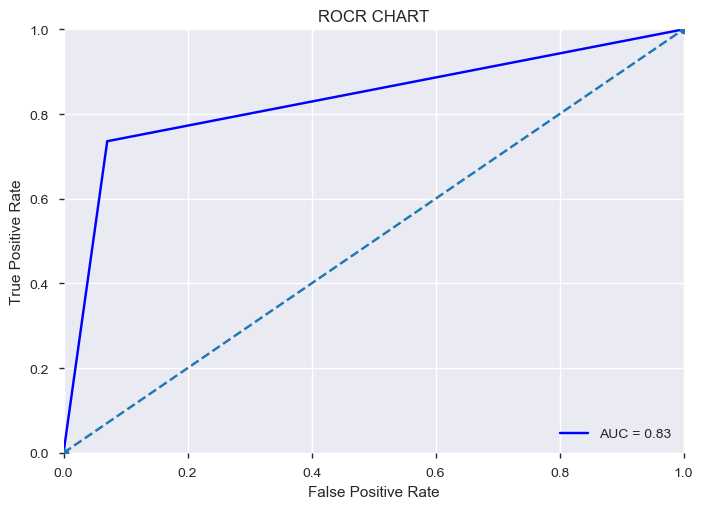

In [88]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix

Confusion Matrix


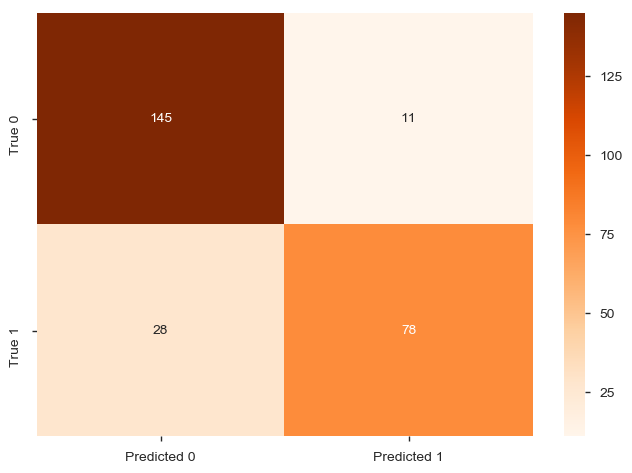

In [89]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,predictions)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Oranges", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

## Build SVM Model

In [90]:
svm_clf = svm.SVC()

In [91]:
#Fitting the model
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': svm_clf.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)

(262, 2)

,actual,predicted
0,0,1
1,0,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [93]:
#Generate Model Diagnostics
predictions = svm_clf.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using SVM : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using SVM : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using SVM : -  106
Negative cases in Test Data using SVM : -  156


In [94]:
#Generating accuracy score
metrics.accuracy_score(y_test, predictions)

0.6679389312977099

## Evaluating a score by cross-validation using sklearn cross_val_score

In [95]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def compute_precision(clf, X, y, scoring='precision'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def compute_recall(clf, X, y, scoring='recall'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

#Accuracy scores from various models
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=0, n_estimators=100)
gboost = GradientBoostingClassifier()
dtree = DecisionTreeClassifier(criterion="gini",max_depth=5)
svm = SVC()
naiveBayes = GaussianNB()

models = [logreg, logreg_cv, rf, gboost, dtree, svm, naiveBayes] 

In [96]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    precision = compute_precision(clf=model, X=X_train, y=y_train, scoring='precision')
    recall = compute_recall(clf=model, X=X_train, y=y_train, scoring='recall')
    print ('Accuracy score  = {0}'.format(score))
    print ('Precision score = {0}'.format(precision))
    print ('Recall score    = {0}'.format(recall))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
Accuracy score  = 0.806035762483131
Precision score = 0.7448848288168581
Recall score    = 0.7383317104836091
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Accuracy score  = 0.8098680705259653
Precision score = 0.7656543532744906
Recall score    = 0.7206101914962675
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Accuracy score  = 0.8079770229770231
Precision score = 0.7644874927030628
Recall score    = 0.7104836092177864
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
Accuracy score  = 0.8204127889654206
Precision score = 0.8140136983843691
Recall score    = 0.6800389483933789
****
Cross-validation of : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Accuracy score  = 0.8012783269362217
Precision score = 0.7950546803836398
Recall score    = 0.6597208698474522
****
Cross-valid

In [97]:
Image(url= "titanic_survived.jpg")

In [98]:
Image(url= "titanic_survived1.jpg")

Millvina Dean — a name she used throughout her life, though she was christened Elizabeth Gladys Dean — spent her early years on a farm owned by her grandfather, a Southampton veterinarian.

She survived with her mother, Georgetta, and 2-year-old brother when they, like many other survivors, were picked up by the liner Carpathia and taken to New York.

Ms. Dean said all she knew of what happened during the sinking she had learned from her mother: “She told me that they heard a tremendous crash, and that my father went up on deck, then came back down again and said, ‘Get the children up and take them to the deck as soon as possible, because the ship has struck an iceberg.’ ”

Her father, Bertram Dean, was among more than 1,500 passengers and crew members who died in the sinking, a fact that Ms. Dean, in an interview at the Southampton nursing home last month, attributed partly to the fact that the Dean family was traveling in third class, or steerage, as the cheapest form of passage was known.
https://www.nytimes.com/2009/06/01/world/europe/01dean.html

### Below are the records as mentioned by Millvina Dean from our exisitng Dataset.

In [99]:
titanicData[titanicData.name.isin(['Dean, Master. Bertram Vere','Dean, Miss. Elizabeth Gladys "Millvina"','Dean, Mr. Bertram Frank','Dean, Mrs. Bertram (Eva Georgetta Light)'
])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
762,3,1,"Dean, Master. Bertram Vere",male,1.0000,1,2,C.A. 2315,20.575,NaN,S,10,NaN,"Devon, England Wichita, KS",Master
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.575,NaN,S,10,NaN,"Devon, England Wichita, KS",Miss
764,3,0,"Dean, Mr. Bertram Frank",male,26.0000,1,2,C.A. 2315,20.575,NaN,S,NaN,NaN,"Devon, England Wichita, KS",Mr
765,3,1,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0000,1,2,C.A. 2315,20.575,NaN,S,10,NaN,"Devon, England Wichita, KS",Mrs
